### Data Analysis of Cyber Operations Incidents

code author: Hilda Hadan <hhadan@iu.edu> <br>
<br>
We used the cyber incidents dataset from CFR Cyber Operations Tracker website. https://microsites-live-backend.cfr.org/cyber-operations<br>
<br>
We performed the data analysis on the June 3rd, 2020 version of the dataset. 

In [16]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime

In [10]:
#read the file and print the first 5 items
data = pd.read_csv("june2020cyber-operations-incidents.csv")

#replace NaN values with ''
data = data.replace(np.nan,'')

data.head(5)

,Title,Date,Affiliations,Description,Response,Victims,Sponsor,Type,Victim Category,Sources_1,Sources_2,Sources_3
0,APT 36,3/16/2020,"Also known as Mythic Leopard, Transparent Trib...",Pakistani government-aligned threat actor that...,,India,Pakistan,,,https://malpedia.caad.fkie.fraunhofer.de/actor...,https://blog.malwarebytes.com/threat-analysis/...,
1,Targeting of Ukraine with coronavirus phishing...,3/13/2020,APT 28,The Russian hackers Hades (aka APT 28) targete...,,Ukrainian citizens,Russian Federation,Espionage,Civil society,https://www.zdnet.com/article/state-sponsored-...,https://twitter.com/RedDrip7/status/1230683740...,
2,Targeting of U.S. government employees,1/30/2020,APT 34,The Iranian state-backed hackers sent out soph...,,U.S. government employees and possibly Westat ...,Iran (Islamic Republic of),Espionage,"Government, Private sector",https://intezer.com/blog/apt/new-iranian-campa...,https://www.zdnet.com/article/iranian-hackers-...,
3,Phishing with fake coronavirus health advisory,3/16/2020,APT 36,The Pakistani government?€?aligned threat acto...,,Likely Indian government or civil society targ...,Pakistan,Espionage,,https://twitter.com/RedDrip7/status/1237983760...,https://blog.malwarebytes.com/threat-analysis/...,
4,Disclosure by Japanese firms of breaches betwe...,2/6/2020,"Unknown, suspected Bronze Butler.",The Japanese defense contractors Pasco and Kob...,,Japanese defense contractors,China,Espionage,Private sector,https://www.bleepingcomputer.com/news/security...,https://this.kiji.is/595817375508235361,


#### Data screening

In [11]:
#number of columns and rows
print('The dataset has',data.shape[0],'rows and',data.shape[1],'columns.')

The dataset has 425 rows and 12 columns.


In [19]:
#the earisest and latest incidents
date = list(data['Date'])
date = list(filter(lambda a: a != '', date))
for i in range(len(date)):
    date[i] = datetime.strptime(date[i], '%m/%d/%Y')
    
print('The dataset has incidents from', min(date), 'to',max(date))

The dataset has incidents from 2005-08-25 00:00:00 to 2020-03-31 00:00:00


In [16]:
#column names
templet = '{:<25}{:<25}{:<25}{:<25}{:<25}'
col = list(data.columns)
i = 0
while i < len(col)-1:
    print(templet.format(col[i],col[i+1],col[i+2],col[i+3],col[i+4]))
    i += 6

Title                    Date                     Affiliations             Description              Response                 
Sponsor                  Type                     Victim Category          Sources_1                Sources_2                


In [13]:
#missing data
count = 0
for (columnName, columnData) in data.iteritems():
    missing = 0
    missing = list(columnData.values).count('')
    if missing >0:
        print('There are',missing,'missing data in column',columnName)
        count +=1
print('Total number of columns have missing data:',count)

There are 7 missing data in column Date
There are 127 missing data in column Affiliations
There are 354 missing data in column Response
There are 26 missing data in column Victims
There are 42 missing data in column Sponsor
There are 27 missing data in column Type
There are 19 missing data in column Victim Category
There are 5 missing data in column Sources_1
There are 110 missing data in column Sources_2
There are 268 missing data in column Sources_3
Total number of columns have missing data: 10


#### Visualization

###### Number of incidents by year

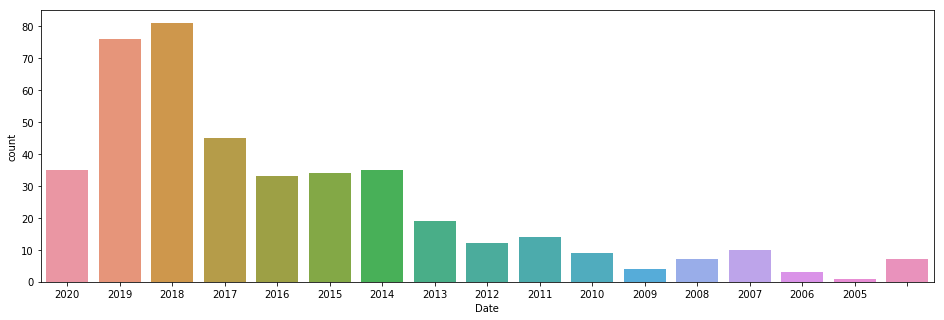

In [23]:
#extract incident years from the dataset
date = []

for item in data['Date']:
        date.append(item[-4:])
date = pd.DataFrame(date,columns=['Date'])

f, axes = plt.subplots(1, 1, figsize=(16,5), sharex=True)
sns.countplot(x="Date",data=date)#.set_xticklabels(labels=['Male','Female','Non-binary','Prefer not to disclose'])
plt.show()

###### Type of incidents by year

In [27]:
#type of incidents in the dataset
print('The dataset includes incidents such as:',', '.join(np.unique(list(data['Type']))))

The dataset includes incidents such as: , Data destruction, Defacement, Denial of service, Doxing, Espionage, Financial Theft, Sabotage


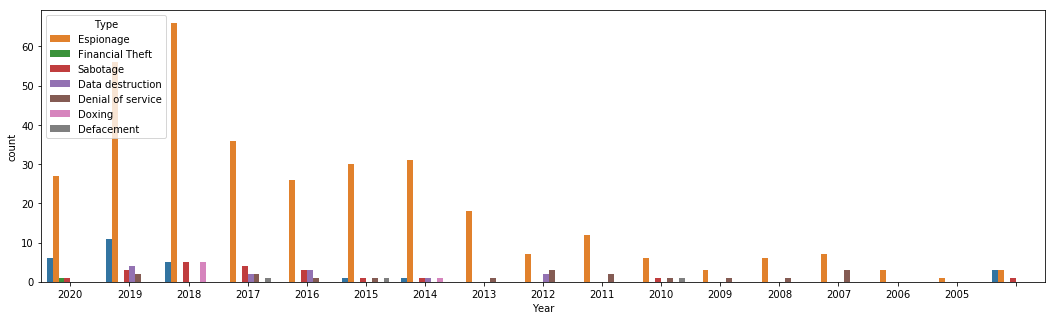

In [57]:
d = []

for index, row in data.iterrows():
    d.append([row['Date'][-4:],row['Type']])
d = pd.DataFrame(d,columns=['Year','Type'])


f, axes = plt.subplots(1, 1, figsize=(18,5), sharex=True)
sns.countplot(x="Year", hue= "Type",data=d)#.set(ylabel = 'Count - Smart Phone scenario',xticklabels=["Deny","Not sure","Allow"])
plt.show()

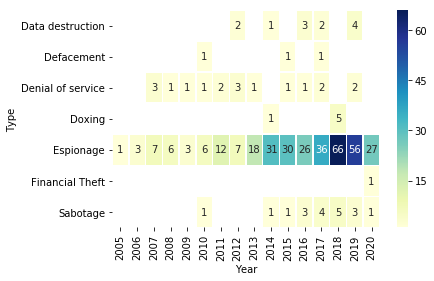

In [71]:
#heatmap
d_count = {}

for index, row in d.iterrows():
    if row['Year']!= "":
        if row['Type']!="":
            if (row['Type'], row['Year']) in d_count:
                d_count[(row['Type'], row['Year'])] += 1
            else:
                d_count[(row['Type'], row['Year'])] =1
d_count = pd.Series(d_count).reset_index()   
d_count.columns = ['Type', 'Year', 'Count']
d_count = d_count.pivot('Type','Year','Count')

sns.heatmap(d_count,annot=True,linewidths=.5,cmap="YlGnBu")

###### Number of attacks by sponsor

In [50]:
#sponsors in the dataset
print('The dataset includes sponsors such as:','; '.join(np.unique(list(data['Sponsor']))))

The dataset includes sponsors such as: ; China; China, Russian Federation; Egypt; Ethiopia; France; Hong Kong; India; Indonesia; Iran (Islamic Republic of); Israel; Israel, United States; Kazakhstan; Korea (Democratic People's Republic of); Korea (Republic of); Lebanon; Mexico; Morocco; Netherlands; Pakistan; Palestine, State of; Panama; Russian Federation; Saudi Arabia; Spain; Taiwan, United States; Turkey; Uganda; United Arab Emirates; United Kingdom; United Kingdom, United States; United States; United States, Australia, Canada, New Zealand, United Kingdom; United States, Israel; Uzbekistan; Vietnam


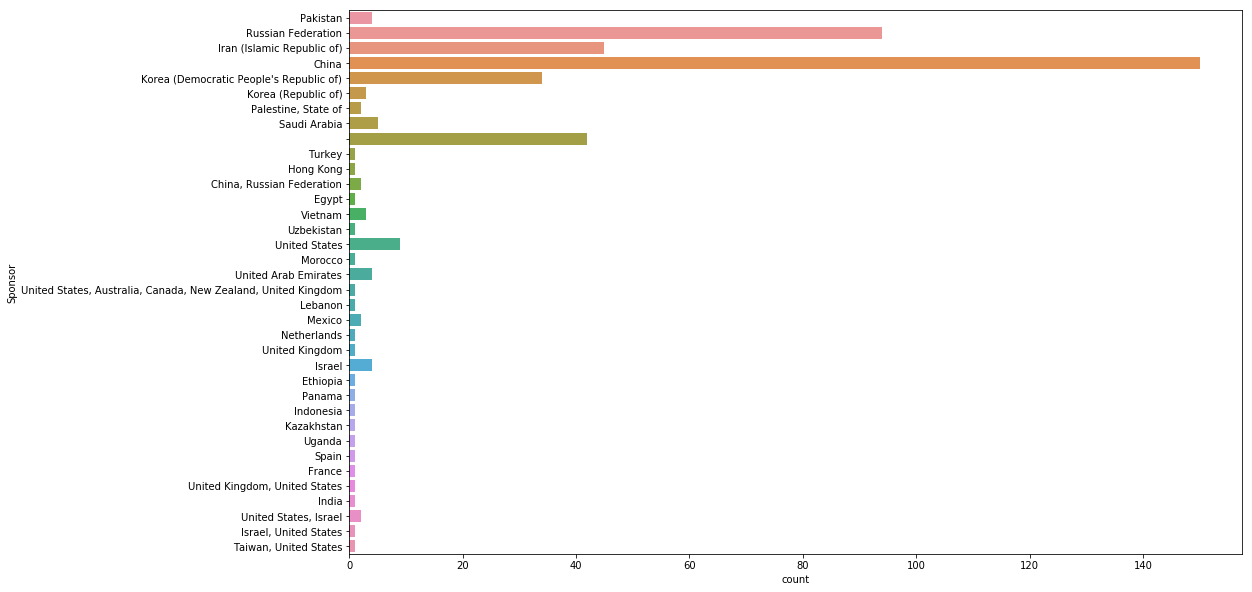

In [56]:
sponsor = []

for item in data['Sponsor']:
        sponsor.append(item)
sponsor = pd.DataFrame(sponsor,columns=['Sponsor'])

f, axes = plt.subplots(1, 1, figsize=(16,10), sharex=True)
sns.countplot(y="Sponsor",data=sponsor)#.set_xticklabels(labels=['Male','Female','Non-binary','Prefer not to disclose'])
plt.show()

###### Number of incidents each Sponsor involved

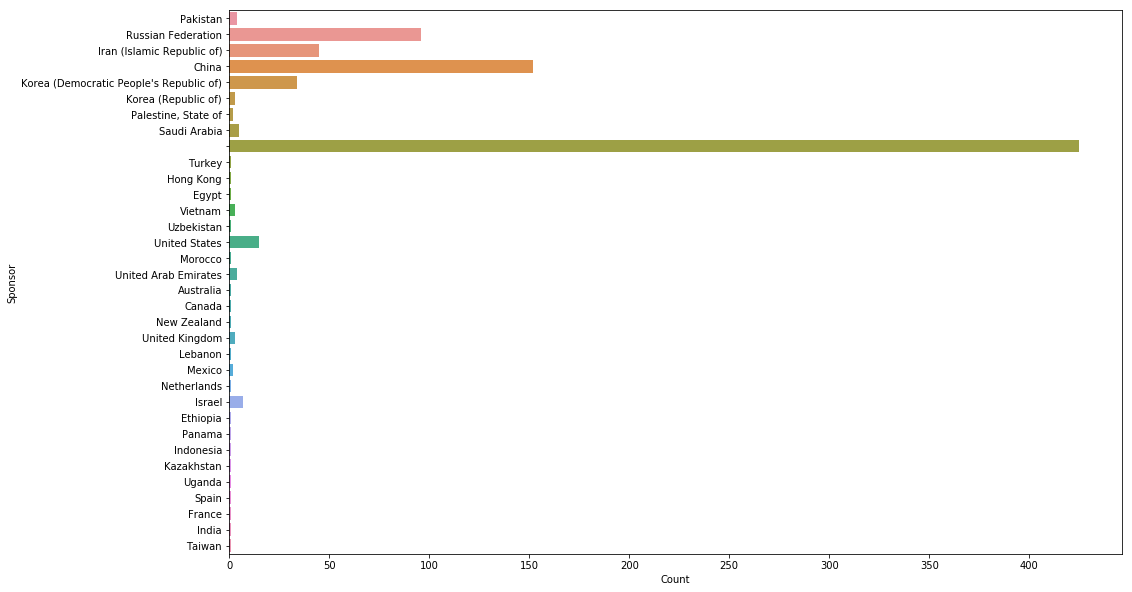

In [145]:
#we find a list of unique sponsors from the chart above:
#" " (a blank) means no sponsor was indicated for the incident
list_sponsors = ['Pakistan','Russian Federation','Iran (Islamic Republic of)','China',"Korea (Democratic People's Republic of)", "Korea (Republic of)",
                "Palestine, State of", "Saudi Arabia","","Turkey","Hong Kong","Egypt","Vietnam","Uzbekistan","United States","Morocco",
                "United Arab Emirates","Australia","Canada","New Zealand","United Kingdom","Lebanon","Mexico","Netherlands","Israel",
                "Ethiopia","Panama","Indonesia","Kazakhstan","Uganda","Spain","France","India","Taiwan"]

count = {}
for item in list_sponsors:
    count[item] = 0

for sponsors in data['Sponsor']:
    for item in count:
        if item in sponsors:
            count[item] +=1
count = pd.DataFrame(list(count.items()),columns = ['Sponsor','Count'])

f, axes = plt.subplots(1, 1, figsize=(16,10), sharex=True)
sns.barplot(y="Sponsor",x= "Count", data=count)#.set_xticklabels(labels=['Male','Female','Non-binary','Prefer not to disclose'])
plt.show()

###### Number of incidents by Victim Category

In [134]:
#victim category in the dataset
print('The dataset includes victims in categories such as:','; '.join(np.unique(list(data['Victim Category']))))

The dataset includes victims in categories such as: ; Civil society; Civil society, Government; Civil society, Private sector; Civil society, Private sector, Government; Government; Government, Civil society; Government, Civil society, Private sector; Government, Military; Government, Military, Private sector; Government, Private sector; Government, Private sector, Civil society; Military; Military, Civil society; Military, Government; Military, Government, Civil society; Military, Private sector; Private sector; Private sector, Civil society; Private sector, Government; Private sector, Government, Civil society, Military; Private sector, Military


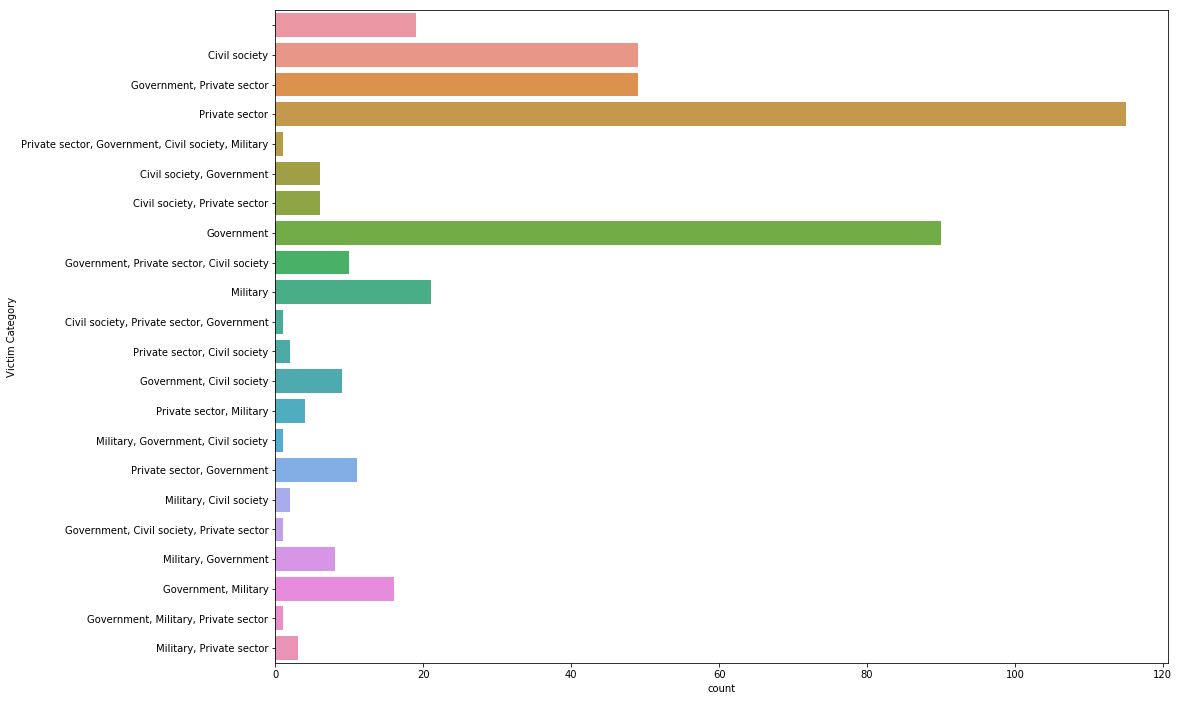

In [141]:
category = []

for item in data['Victim Category']:
        category.append(item)
category = pd.DataFrame(category,columns=['Victim Category'])

f, axes = plt.subplots(1, 1, figsize=(16,12), sharex=True)
sns.countplot(y="Victim Category",data=category)#.set_xticklabels(labels=['Male','Female','Non-binary','Prefer not to disclose'])
plt.show()

###### Number of incidents each category of victims got involved

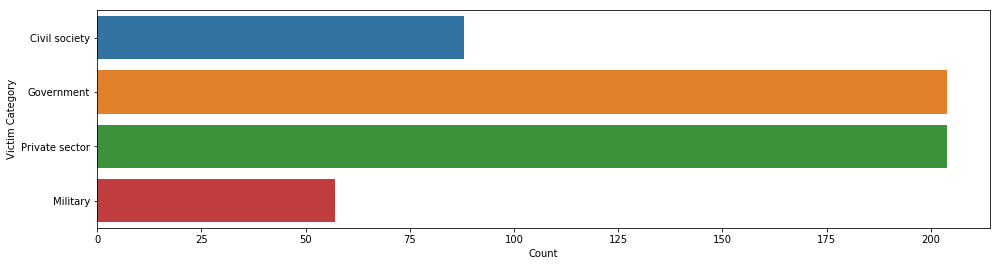

In [142]:
#unique categories
list_category = ["Civil society","Government","Private sector","Military"]

count = {}
for item in list_category:
    count[item] = 0

for category in data['Victim Category']:
    for item in count:
        if item in category:
            count[item] +=1
count = pd.DataFrame(list(count.items()),columns = ['Victim Category','Count'])

f, axes = plt.subplots(1, 1, figsize=(16,4), sharex=True)
sns.barplot(y="Victim Category",x= "Count", data=count)#.set_xticklabels(labels=['Male','Female','Non-binary','Prefer not to disclose'])
plt.show()

###### Count of incident responses

In [24]:
#responses in the dataset
responses = []

for item in data['Response']:
    responses.append(re.sub(r"http\S+", "", item)) #remove URL that was orignially in the dataset

print('The dataset includes responses such as:','; '.join(np.unique(responses)))

The dataset includes responses such as: ; Confirmation   ; Criminal charges   ; Denial   ; Denouncement   ; Hack Back   ; Sanctions   ; Unknown   


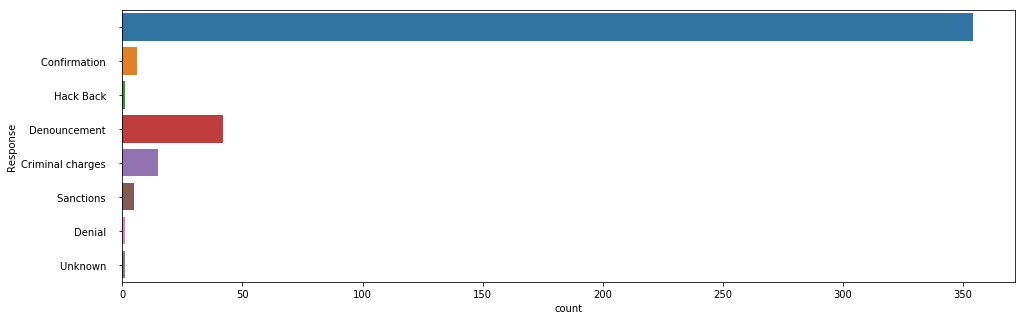

In [26]:
response = []

for item in data['Response']:
        response.append(re.sub(r"http\S+", "", item))
response = pd.DataFrame(response,columns=['Response'])

f, axes = plt.subplots(1, 1, figsize=(16,5), sharex=True)
sns.countplot(y="Response",data=response)#.set_xticklabels(labels=['Male','Female','Non-binary','Prefer not to disclose'])
plt.show()

###### Victims

In [28]:
victims = data['Victims']
victims

0                                                  India
1                                     Ukrainian citizens
2      U.S. government employees and possibly Westat ...
3      Likely Indian government or civil society targ...
4                           Japanese defense contractors
5                              Universities in Hong Kong
6      Targets across sectors and throughout the worl...
7                               Cryptocurrency exchanges
8      Academics, researchers, and dissidents in the ...
9                              World Health Organization
10                       Hong Kong citizens with iPhones
11                        Malaysian government officials
12                   Multiple entities across the world.
13                                                      
14                   Ukrainian national security targets
15     North Koreans and North Korean?€?focused profe...
16                             Austrian Foreign Ministry
17                      Employe

further analysis is in-progress